# Tutorial


In [3]:
import sklearn
from tsai.basics import *

dsid = 'ETTh1'
df_raw = get_long_term_forecasting_data(dsid)
df_raw

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [5]:
dataPath = 'data/ETTh1'
datetime_col = "date"
freq = 'H'
columns = df_raw.columns[1:]
method = 'ffill'
value = 0

# pipeline
preproc_pipe = sklearn.pipeline.Pipeline([
    ('shrinker', TSShrinkDataFrame()), # shrink dataframe memory usage
    ('drop_duplicates', TSDropDuplicates(datetime_col=datetime_col)), # drop duplicate rows (if any)
    ('add_mts', TSAddMissingTimestamps(datetime_col=datetime_col, freq=freq)), # ass missing timestamps (if any)
    ('fill_missing', TSFillMissing(columns=columns, method=method, value=value)), # fill missing data (1st ffill. 2nd value=0)
    ], 
    verbose=True)
mkdir('data', exist_ok=True, parents=True)
save_object(preproc_pipe, dataPath + '/preproc_pipe.pkl')
preproc_pipe = load_object(dataPath + '/preproc_pipe.pkl')

df = preproc_pipe.fit_transform(df_raw)
df

data\ETTh1 directory already exists.
Pipeline saved as data\ETTh1\preproc_pipe.pkl
Initial memory usage: 1.06 MB   
Final memory usage  : 612.55 KB  (-43.7%)
[Pipeline] .......... (step 1 of 4) Processing shrinker, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing drop_duplicates, total=   0.0s
[Pipeline] ........... (step 3 of 4) Processing add_mts, total=   0.0s
[Pipeline] ...... (step 4 of 4) Processing fill_missing, total=   0.0s


,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


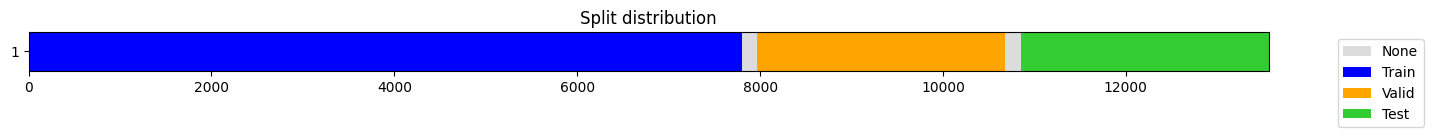

((#7801) [0,1,2,3,4,5,6,7,8,9...],
 (#2713) [7968,7969,7970,7971,7972,7973,7974,7975,7976,7977...],
 (#2713) [10848,10849,10850,10851,10852,10853,10854,10855,10856,10857...])

In [6]:
fcst_history = 672 # # steps in the past
fcst_horizon = 168  # # steps in the future
valid_size   = 0.1  # int or float indicating the size of the training set
test_size    = 0.2  # int or float indicating the size of the test set

splits = get_long_term_forecasting_splits(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, dsid=dsid)
splits

In [7]:
columns = df.columns[1:]
train_split = splits[0]

# pipeline
exp_pipe = sklearn.pipeline.Pipeline([
    ('scaler', TSStandardScaler(columns=columns)), # standardize data using train_split
    ], 
    verbose=True)
save_object(exp_pipe, dataPath + '/exp_pipe.pkl')
exp_pipe = load_object(dataPath + '/exp_pipe.pkl')

df_scaled = exp_pipe.fit_transform(df, scaler__idxs=train_split)
df_scaled

data\ETTh1 directory already exists.
Pipeline saved as data\ETTh1\exp_pipe.pkl
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,-0.448425,-0.000633,-0.734831,-0.101133,1.331604,0.852467,1.407382
1,2016-07-01 01:00:00,-0.472272,0.030334,-0.755098,-0.119297,1.273983,0.905885,1.121448
2,2016-07-01 02:00:00,-0.567661,-0.124498,-0.795442,-0.155121,0.929198,0.642243,1.121448
3,2016-07-01 03:00:00,-0.579584,-0.031599,-0.795442,-0.136957,0.957536,0.747355,0.835618
4,2016-07-01 04:00:00,-0.531890,-0.031599,-0.755098,-0.101133,1.015158,0.747355,0.513003
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.783324,0.711593,-2.101226,0.741496,0.641090,1.167804,-0.637820
17416,2018-06-26 16:00:00,-2.462787,1.052223,-2.767377,0.813145,0.698712,1.429724,-0.623232
17417,2018-06-26 17:00:00,-0.984805,0.835458,-1.192443,0.723836,0.871576,1.167804,-0.703781
17418,2018-06-26 18:00:00,0.159496,0.835458,-0.001251,0.723836,0.813955,1.010998,-0.755153


In [8]:
x_vars = df.columns[1:]
y_vars = df.columns[1:]

In [9]:

X, y = prepare_forecasting_data(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, x_vars=x_vars, y_vars=y_vars)
X.shape, y.shape

((16581, 7, 672), (16581, 7, 168))

In [11]:
learn = TSForecaster(X, y, splits=splits, batch_size=16, path=dataPath, pipelines=[preproc_pipe, exp_pipe],
                     arch="LSTMPlus", metrics=[mse, mae], cbs=ShowGraph())
learn.summary()

not enough values to plot a chart


LSTMPlus (Input shape: 16 x 7 x 672)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 7 x 672        
Identity                                                       
Identity                                                       
____________________________________________________________________________
                     16 x 672 x 100      
LSTM                                                           
____________________________________________________________________________
                     16 x 672 x 100      
LSTMOutput                                                     
____________________________________________________________________________
                     16 x 100 x 672      
Transpose                                                      
____________________________________________________________________________
                     16 x 67200          
Reshape                                                      

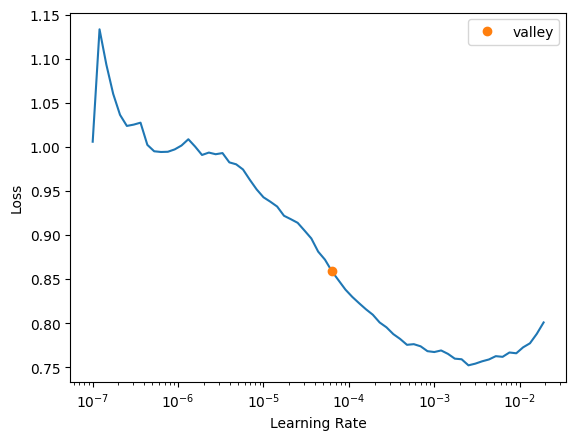

In [12]:
lr_max = learn.lr_find().valley

In [14]:
learn = TSForecaster(X, y, splits=splits, batch_size=16, path=dataPath, pipelines=[preproc_pipe, exp_pipe],
                     arch="LSTMPlus", metrics=[mse, mae], cbs=ShowGraph())

n_epochs = 100
learn.fit_one_cycle(n_epochs, lr_max=lr_max)
learn.export('LSTM.pt')

KeyboardInterrupt: 

In [66]:
from tsai.inference import load_learner
from sklearn.metrics import mean_squared_error, mean_absolute_error

learn = load_learner('models/temp.pt')
y_test_preds, *_ = learn.get_X_preds(X[splits[2]])
y_test_preds = to_np(y_test_preds)
print(f"y_test_preds.shape: {y_test_preds.shape}")

y_test = y[splits[2]]
results_df = pd.DataFrame(columns=["mse", "mae"])
results_df.loc["test", "mse"] = mean_squared_error(y_test.flatten(), y_test_preds.flatten())
results_df.loc["test", "mae"] = mean_absolute_error(y_test.flatten(), y_test_preds.flatten())
results_df

y_test_preds.shape: (134, 7, 60)


,mse,mae
test,4.365259,1.433391


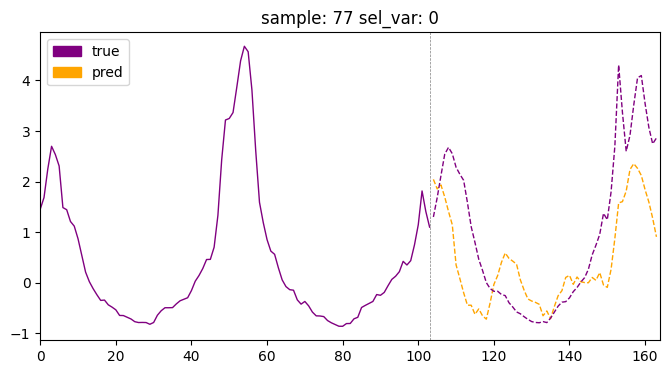

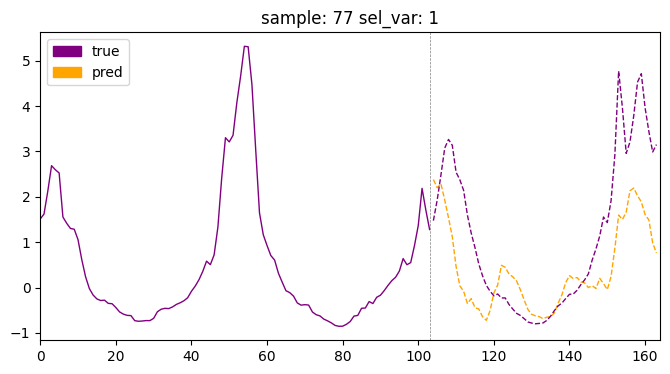

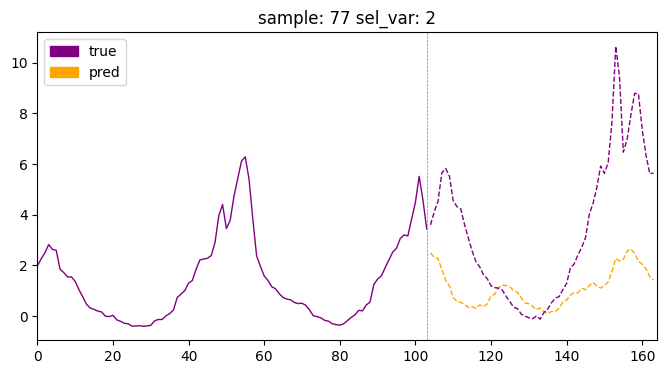

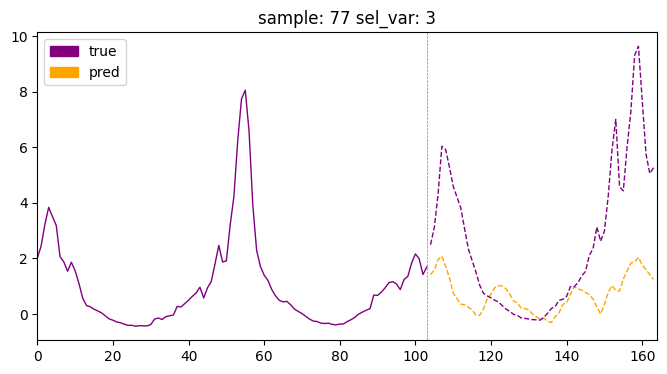

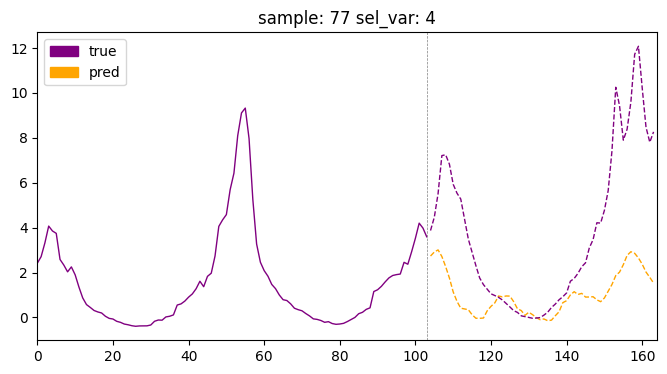

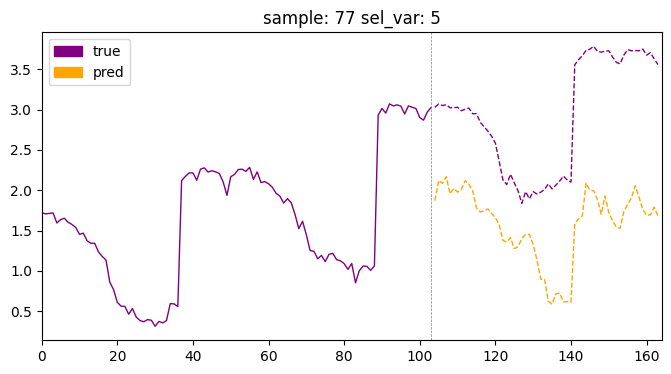

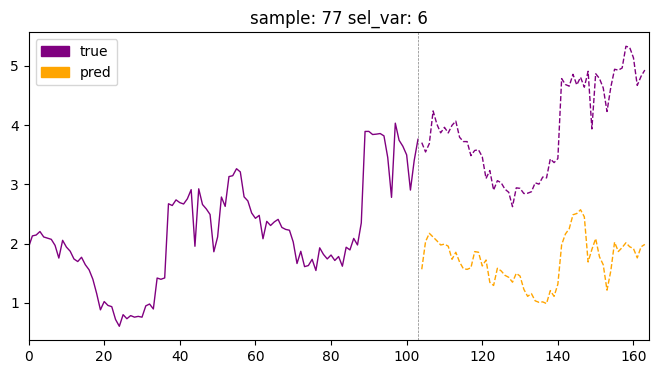

In [67]:
X_test = X[splits[2]]
y_test = y[splits[2]]
plot_forecast(X_test, y_test, y_test_preds, sel_vars=True)

# Apply for custom data


In [1]:
from sklearn.base import TransformerMixin, BaseEstimator

class DateTimeConverter(TransformerMixin, BaseEstimator):
    def __init__(self, 
                 datetime_col):
        self.datetime_col = datetime_col
    def fit(self, X, y=None, **fit_params):
        X[self.datetime_col] = pd.to_datetime(X[self.datetime_col])
        return self
    def transform(self, X, y=None, **fit_params):
        X[self.datetime_col] = pd.to_datetime(X[self.datetime_col])
        return X

In [2]:
import sklearn
import pandas as pd
from pathlib import Path
from tsai.basics import *

dataPath = Path('data/airline/airline.csv')
folderPath = dataPath.parent
df_raw = pd.read_csv(dataPath)
df_raw

,Month,passengers_in_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
datetime_col = "Month"
freq = 'MS'
columns = df_raw.columns[1:]
method = 'ffill'
value = 0

# pipeline
preproc_pipe = sklearn.pipeline.Pipeline([
    ('datetime_converter', DateTimeConverter(datetime_col=datetime_col)), # convert datetime column to datetime
    ('shrinker', TSShrinkDataFrame()), # shrink dataframe memory usage
    ('drop_duplicates', TSDropDuplicates(datetime_col=datetime_col)), # drop duplicate rows (if any)
    ('add_mts', TSAddMissingTimestamps(datetime_col=datetime_col, freq=freq)), # ass missing timestamps (if any)
    ('fill_missing', TSFillMissing(columns=columns, method=method, value=value)), # fill missing data (1st ffill. 2nd value=0)
    ], 
    verbose=True)

save_object(preproc_pipe, folderPath /'preproc_pipe.pkl')

data\airline directory already exists.
Pipeline saved as data\airline\preproc_pipe.pkl


In [4]:
preprocessPipePath = Path('data/airline/preproc_pipe.pkl')

preproc_pipe = load_object(preprocessPipePath)
df = preproc_pipe.fit_transform(df_raw)
df

[Pipeline]  (step 1 of 5) Processing datetime_converter, total=   0.0s
Initial memory usage: 2.38 KB   
Final memory usage  : 1.53 KB    (-35.5%)
[Pipeline] .......... (step 2 of 5) Processing shrinker, total=   0.0s
[Pipeline] ... (step 3 of 5) Processing drop_duplicates, total=   0.0s
[Pipeline] ........... (step 4 of 5) Processing add_mts, total=   0.0s
[Pipeline] ...... (step 5 of 5) Processing fill_missing, total=   0.0s


,Month,passengers_in_thousands
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


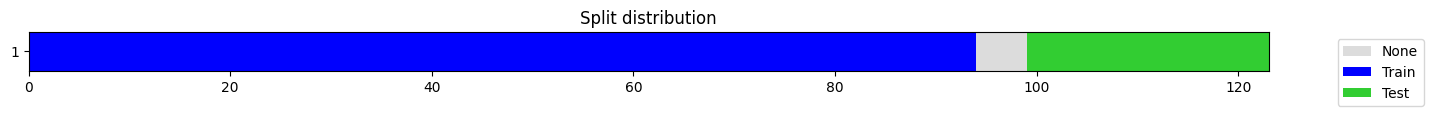

((#94) [0,1,2,3,4,5,6,7,8,9...],
 (#24) [99,100,101,102,103,104,105,106,107,108...])

In [5]:
fcst_history = 16 # # steps in the past
fcst_horizon = 6 # # steps in the future

splits = get_forecasting_splits(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, valid_size=0.2,test_size = 0)
splits

In [6]:
columns = df.columns[1:]
train_split = splits[0]

scalePipePath = Path('data/airline/scale_pipe.pkl')
# pipeline
scale_pipe = sklearn.pipeline.Pipeline([
    ('scaler', TSStandardScaler(columns=columns)), # standardize data using train_split
    ], 
    verbose=True)


save_object(scale_pipe, scalePipePath)
scale_pipe = load_object(scalePipePath)

df = scale_pipe.fit_transform(df, scaler__idxs=train_split)
df

data\airline directory already exists.
Pipeline saved as data\airline\scale_pipe.pkl
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


,Month,passengers_in_thousands
0,1949-01-01,-1.394553
1,1949-02-01,-1.310977
2,1949-03-01,-1.115968
3,1949-04-01,-1.157756
4,1949-05-01,-1.269190
...,...,...
139,1960-08-01,5.486485
140,1960-09-01,4.121421
141,1960-10-01,3.466747
142,1960-11-01,2.477772


In [7]:
x_vars = df.columns[1:]
y_vars = df.columns[1:]

In [8]:
X, y = prepare_forecasting_data(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, x_vars=x_vars, y_vars=y_vars)
X.shape, y.shape

((123, 1, 16), (123, 1, 6))

In [10]:
# arch_config = dict(
#     n_layers=3,  # number of encoder layers
#     n_heads=4,  # number of heads
#     d_model=16,  # dimension of model
#     d_ff=128,  # dimension of fully connected network
#     attn_dropout=0.0, # dropout applied to the attention weights
#     dropout=0.3,  # dropout applied to all linear layers in the encoder except q,k&v projections
#     patch_len=12,  # length of the patch applied to the time series to create patches
#     stride=2,  # stride used when creating patches
#     padding_patch=True,  # padding_patch
# )

# learn = TSForecaster(X, y, splits=splits, batch_size=16, path="models", pipelines=[preproc_pipe, scale_pipe],
#                      arch="PatchTST", arch_config = arch_config, metrics=[mse, mae], cbs=ShowGraph())
learn = TSForecaster(X, y, splits=splits, batch_size=16, path="models", pipelines=[preproc_pipe, scale_pipe],
                     arch="LSTMPlus", metrics=[mse, mae], cbs=ShowGraph())
learn.dls.valid.drop_last = True
learn.summary()

not enough values to plot a chart


LSTMPlus (Input shape: 16 x 1 x 16)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 1 x 16         
Identity                                                       
Identity                                                       
____________________________________________________________________________
                     16 x 16 x 100       
LSTM                                                           
____________________________________________________________________________
                     16 x 16 x 100       
LSTMOutput                                                     
____________________________________________________________________________
                     16 x 100 x 16       
Transpose                                                      
____________________________________________________________________________
                     16 x 1600           
Reshape                                                       

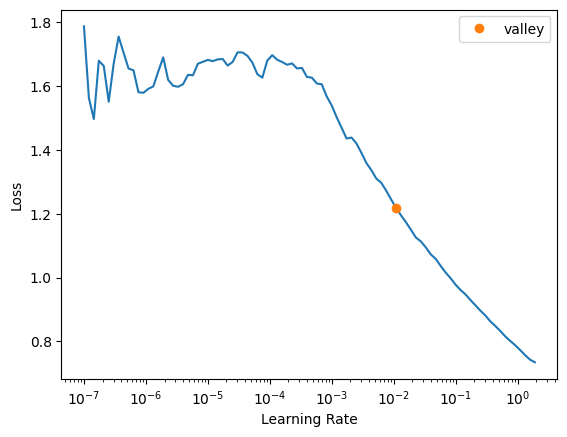

In [11]:
lr_max = learn.lr_find().valley

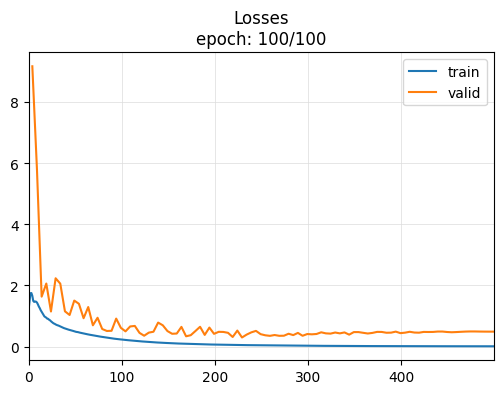

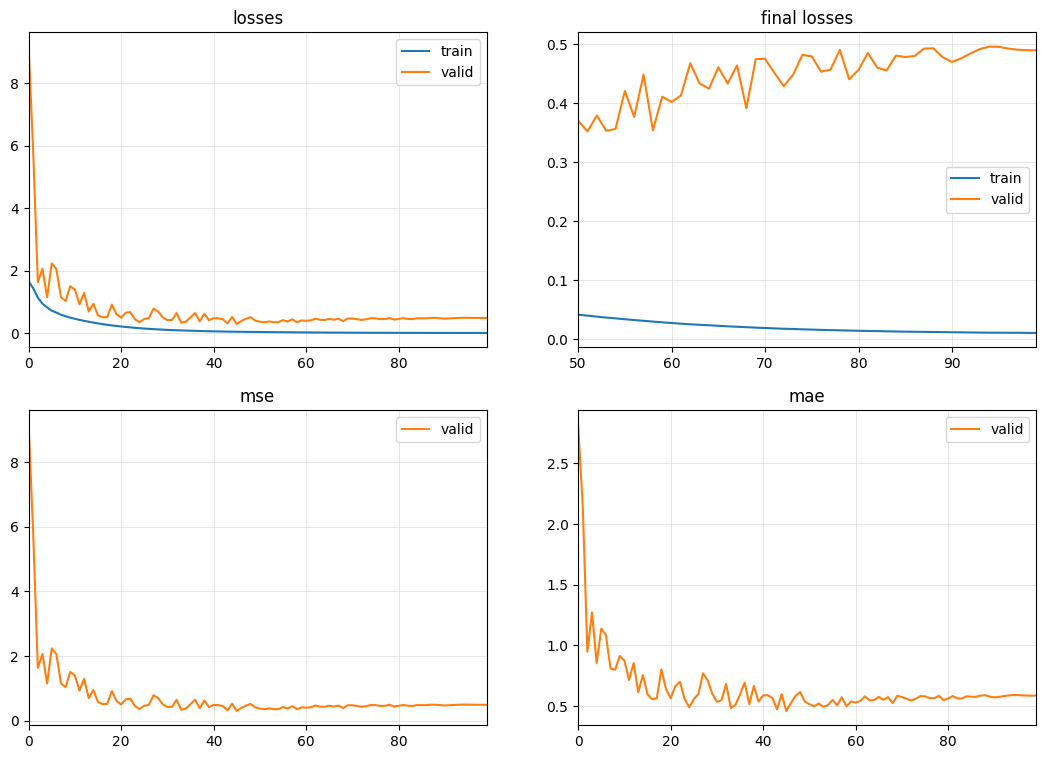

In [14]:
modelPath = Path('data/airline')
# learn = TSForecaster(X, y, splits=splits, batch_size=16, path=modelPath, pipelines=[preproc_pipe, scale_pipe],
#                      arch="PatchTST", arch_config=arch_config, metrics=[mse, mae], cbs=[ShowGraph()])

learn = TSForecaster(X, y, splits=splits, batch_size=16, path=modelPath, pipelines=[preproc_pipe, scale_pipe],
                     arch="LSTMPlus", metrics=[mse, mae], cbs=ShowGraph())

n_epochs = 100
learn.fit_one_cycle(n_epochs, lr_max=lr_max)
learn.export('LSTM.pt')

In [22]:
import pandas as pd
from tsai.basics import *
from pathlib import Path
from src.utils import DateTimeConverter

df_raw = pd.read_csv('data/airline/airline.csv')
modelPath = Path('data/airline/patchTST.pt')

lookbackWindow = 16
forecastWindow = 6
datetime_col = "Month"
freq = 'MS'
input_field = ['passengers_in_thousands']
output_field = ['passengers_in_thousands']

In [23]:
learn = load_learner(modelPath)
df = df_raw.copy()
df = learn.transform(df)

old_X, _ = prepare_forecasting_data(df, fcst_history=lookbackWindow, fcst_horizon=forecastWindow,
                                x_vars=input_field, y_vars=output_field)
old_preds, *_ = learn.get_X_preds(old_X)
old_preds = torch.cat((old_preds[:-1, :,0], old_preds[-1,:,:].T), dim=0)

lastlookbackWindow, _ = prepare_forecasting_data(df[-lookbackWindow:], fcst_history=lookbackWindow, fcst_horizon=0,
                                                x_vars=input_field, y_vars=output_field)

new_pred, *_ = learn.get_X_preds(lastlookbackWindow)
new_pred = torch.swapaxes(new_pred.squeeze(0), 0, 1)
preds = torch.concat((old_preds, new_pred))

dates = pd.date_range(start=df.loc[lookbackWindow, datetime_col],
                periods = len(df.loc[lookbackWindow:]) + forecastWindow,
                freq=freq)
preds_df = pd.DataFrame(dates, columns=['Month'])

preds_df.loc[:, output_field] = preds

learn.pipelines[1].inverse_transform(df)
learn.pipelines[1].inverse_transform(preds_df)

new_columns = [col + '_pred' if col in output_field else col for col in preds_df.columns]

preds_df = preds_df.rename(columns=dict(zip(df.columns, new_columns)))

In [24]:
merged_df = pd.merge(df, preds_df, on='Month', how='outer')

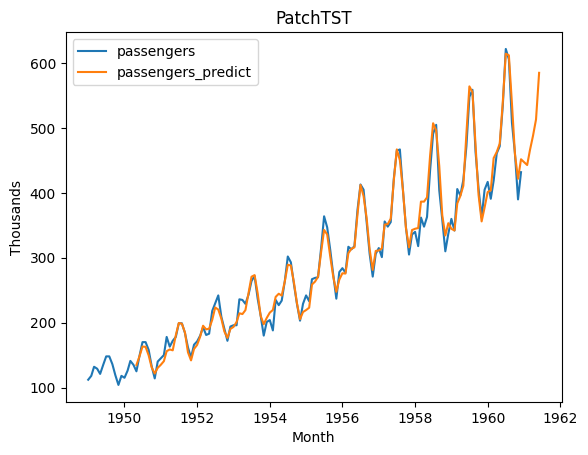

In [25]:
import matplotlib.pyplot as plt

plt.plot(merged_df['Month'], merged_df['passengers_in_thousands'], label = 'passengers')
plt.plot(merged_df['Month'], merged_df['passengers_in_thousands_pred'], label = 'passengers_predict')

plt.xlabel('Month')
plt.ylabel('Thousands')

plt.title("PatchTST")
plt.legend()
plt.show()

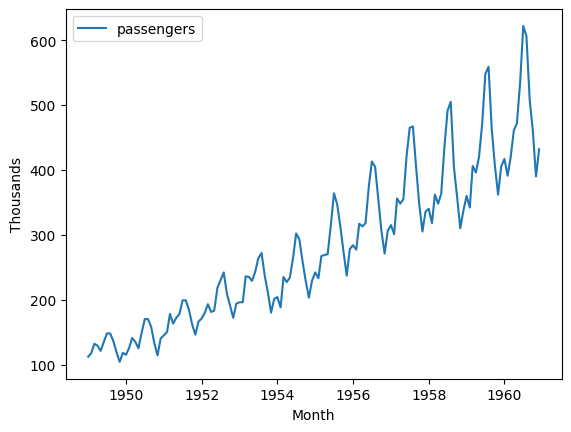

In [19]:
plt.plot(merged_df['Month'], merged_df['passengers_in_thousands'], label = 'passengers')
plt.xlabel('Month')
plt.ylabel('Thousands')

plt.legend()
plt.show()

# Using Class


In [1]:
from src.forecast_strategy import DeepLearningStrategy
from src.utils import DateTimeConverter

import pandas as pd
from pathlib import Path

data = pd.read_csv('data/airline/airline.csv')

input_field = ['passengers_in_thousands']
output_field = ['passengers_in_thousands']

datetime_col = 'Month'
freq = 'MS'

nEpochs = 50
lookbackWindow = 16
forecastWindow = 6

patchTSTStrategy = DeepLearningStrategy(model_path = Path('data/airline/patchTST.pt'),
                                        arch="PatchTST",    
                                        arch_config_path = 'src/models/PatchTST/n3_h4_md16_fd128_pl2_s2.json')

patchTSTStrategy.load_data(data)

[Pipeline]  (step 1 of 5) Processing datetime_converter, total=   0.0s
Initial memory usage: 1.06 MB   
Final memory usage  : 612.55 KB  (-43.7%)
[Pipeline] .......... (step 2 of 5) Processing shrinker, total=   0.0s
[Pipeline] ... (step 3 of 5) Processing drop_duplicates, total=   0.0s
[Pipeline] ........... (step 4 of 5) Processing add_mts, total=   0.0s
[Pipeline] ...... (step 5 of 5) Processing fill_missing, total=   0.0s


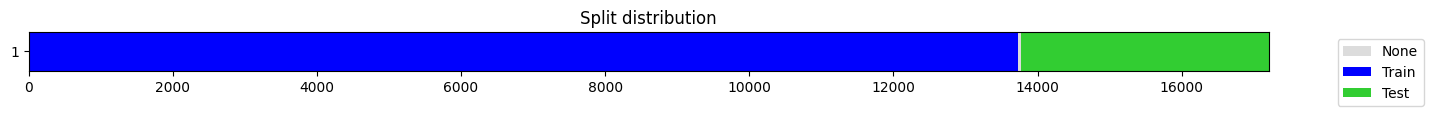

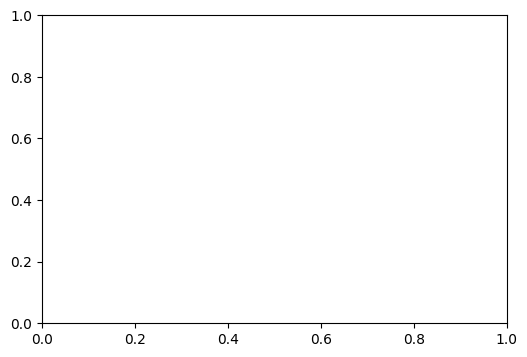

KeyboardInterrupt: 

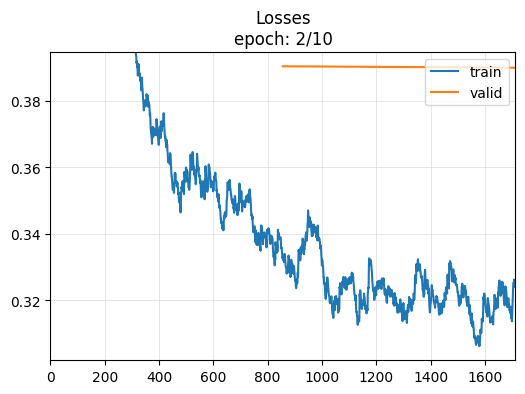

In [2]:
patchTSTStrategy.train(input_field=input_field, output_field=output_field,
                        lookbackWindow=lookbackWindow, forecastWindow=forecastWindow,
                        datetime_col=datetime_col, freq=freq, nEpochs=nEpochs)

In [2]:
merged_df = patchTSTStrategy.forecast(input_field=input_field, output_field=output_field,
                          forecastWindow=forecastWindow, lookbackWindow=lookbackWindow,
                          datetime_col=datetime_col, freq=freq)

In [5]:
patchTSTStrategy._model.get_parameter

<bound method Module.get_parameter of PatchTST(
  (model): _PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((2, 0))
    (unfold): Unfold(kernel_size=(1, 12), dilation=1, padding=0, stride=2)
    (backbone): _TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0-2): 3 x _TSTiEncoderLayer(
          (self_attn): _MultiheadAttention(
            (W_Q): Linear(in_features=16, out_features=16, bias=True)
            (W_K): Linear(in_features=16, out_features=16, bias=True)
            (W_V): Linear(in_features=16, out_features=16, bias=True)
            (sdp_attn): _ScaledDotProductAttention(
              (attn_dropout): Dropout(p=0.0, inplace=False)
            )
            (to_out): Sequential(
              (0): Linear(in_features=16, out_features=16, bias=True)
              (1): Dropout(p=0.3, inplace=False)
            )
          )
 

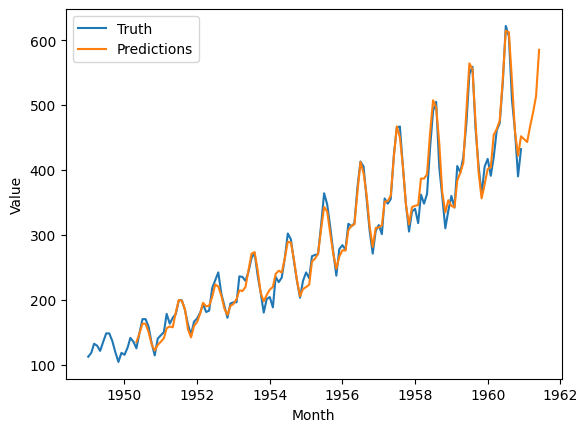

In [3]:
import matplotlib.pyplot as plt

plt.plot(merged_df['Month'], merged_df['passengers_in_thousands'], label = 'Truth')
plt.plot(merged_df['Month'], merged_df['passengers_in_thousands_pred'], label = 'Predictions')

plt.xlabel('Month')
plt.ylabel('Value')

plt.legend()
plt.show()

In [1]:
from src.forecast_strategy import SARIMAStrategy
from src.utils import DateTimeConverter

import pandas as pd
from pathlib import Path

data = pd.read_csv('data/airline/airline.csv')

input_field = ['passengers_in_thousands']
output_field = ['passengers_in_thousands']

datetime_col = 'Month'
freq = 'MS'

samira_strategy = SARIMAStrategy()

samira_strategy.load_data(data)

samira_strategy.train(input_field = input_field, output_field= output_field, forecastWindow=6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Thu, 08 Jun 2023   AIC                           1017.847
Time:                                     11:47:38   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3134     14.556      8.884      0.000     100.783     157.844
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2]:
merged_df = samira_strategy.forecast(input_field = input_field, output_field= output_field, 
                         forecastWindow=6, datetime_col = datetime_col, freq= freq)

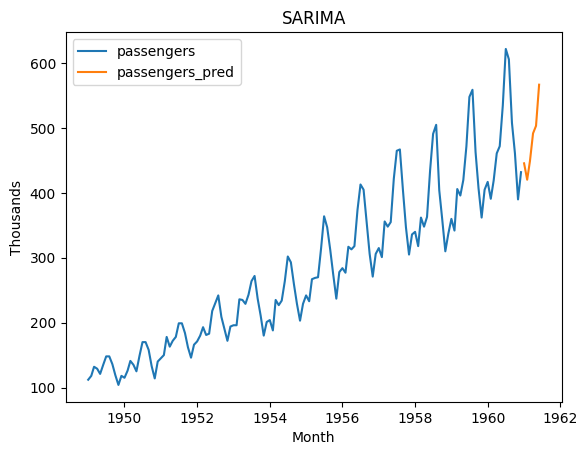

In [5]:
import matplotlib.pyplot as plt

plt.plot(merged_df['Month'], merged_df['passengers_in_thousands'], label = 'passengers')
plt.plot(merged_df['Month'], merged_df['passengers_in_thousands_pred'], label = 'passengers_pred')

plt.xlabel('Month')
plt.ylabel('Thousands')

plt.title('SARIMA')
plt.legend()
plt.show()

In [6]:
samira_strategy._data['passengers_in_thousands_pred']

KeyError: 'passengers_in_thousands_pred'